PARCIAL VIRTUAL 1 
DANIEL SUAZA VARELA
202311517

In [26]:
#Importar librerias
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sympy import diff,symbols,dsolve, Matrix, pi, cos, sin, simplify, eye, solve, latex, atan2, pprint, init_printing, Derivative, sqrt, integrate, Eq, lambdify
from sympy.physics.mechanics import ReferenceFrame, dynamicsymbols, init_vprinting

# Configuración de impresión en formato LaTeX (MathJax)
init_vprinting(use_latex='mathjax')

PUNTO 1

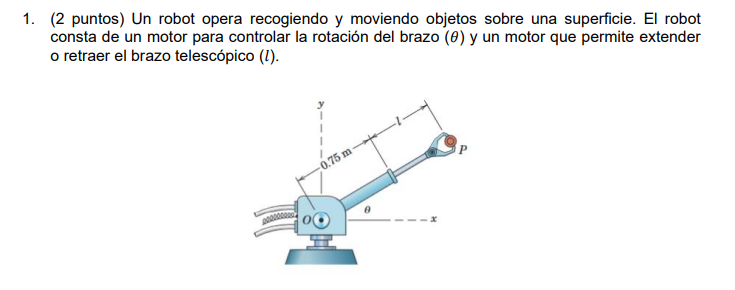

In [27]:
t = symbols("t")
theta, l = dynamicsymbols("theta , l")

N = ReferenceFrame("N")
A = N.orientnew("A", "axis", (theta,N.z))

r = (0.75+l)*A.x
display(r.express(N))

(l + 0.75)⋅cos(θ) n_x + (l + 0.75)⋅sin(θ) n_y

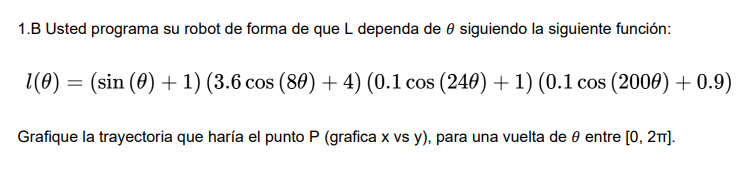

((sin(θ) + 1)⋅(3.6⋅cos(8⋅θ) + 4)⋅(0.1⋅cos(24⋅θ) + 1)⋅(0.1⋅cos(200⋅θ) + 0.9) +  ↪

↪ 0.75)⋅cos(θ) n_x + ((sin(θ) + 1)⋅(3.6⋅cos(8⋅θ) + 4)⋅(0.1⋅cos(24⋅θ) + 1)⋅(0.1 ↪

↪ ⋅cos(200⋅θ) + 0.9) + 0.75)⋅sin(θ) n_y

C:\Users\mvare\AppData\Local\Temp\ipykernel_10504\322879474.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b." (-> color='b'). The keyword argument will take precedence.
  plt.plot(lista_de_valores[0], lista_de_valores[1], "b.", color="blue")


(-10.481637589417069, 10.538459099928787, -2.9024676649647896, 14.790728391199 ↪

↪ 861)

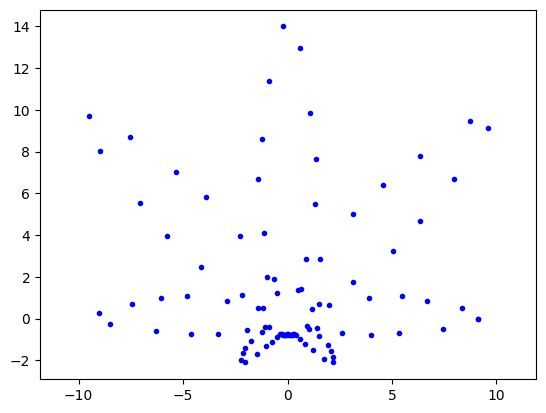

In [28]:
l = (sin(theta)+1)*(3.6*cos(8*theta)+4)*(0.1*cos(24*theta)+1)*(0.1*cos(200*theta)+0.9)
r = (0.75+l)*A.x
display(r.express(N))

r_exp = r.express(N)

#creamos uina lista de expresiones
x_exp = r_exp.dot(N.x)
y_exp = r_exp.dot(N.y)

calculadora = lambdify([theta], [x_exp, y_exp])
for theta in np.linspace(0, 2*np.pi, 100):
    lista_de_valores = calculadora(theta)
    plt.plot(lista_de_valores[0], lista_de_valores[1], "b.", color="blue")
        
plt.axis("equal")
    

PUNTO 2

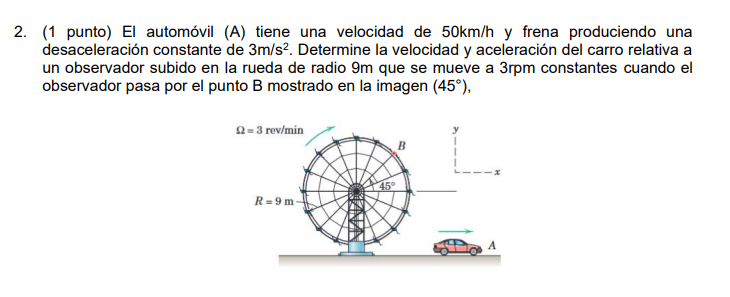

In [29]:
t = symbols("t")
Va = symbols("Va")
Aa = symbols("Aa")
theta = dynamicsymbols("theta")

N = ReferenceFrame("N")
A = N.orientnew("A", "axis", (theta, N.z))
R = symbols("R")

#B
PB = R*A.x
Vb = PB.diff(t,N)
display(Vb)
Ab = Vb.diff(t,N)

#A
VVa = Va*N.x
AAa = Aa*N.x

V_relativa =  VVa.express(N) -Vb.express(N) 
display(V_relativa)
A_relativa = AAa.express(N) - Ab.express(N) 

dicti = {
    R:9,
    Va: 50*(1000/1)*(1/3600),
    Aa: -3,
    theta: np.deg2rad(45),
    theta.diff(t): -3*(2*pi/1)*(1/60)
}

display(V_relativa.subs(dicti).simplify().evalf())

display(A_relativa.subs(dicti).simplify().evalf())

-R⋅sin(θ)⋅θ̇ n_x + R⋅cos(θ)⋅θ̇ n_y

(R⋅sin(θ)⋅θ̇ + Va) n_x + -R⋅cos(θ)⋅θ̇ n_y

11.8895915667176 n_x + 1.99929732217127 n_y

-2.3719022220325 n_x + 0.628097777967499 n_y

PUNTO 3

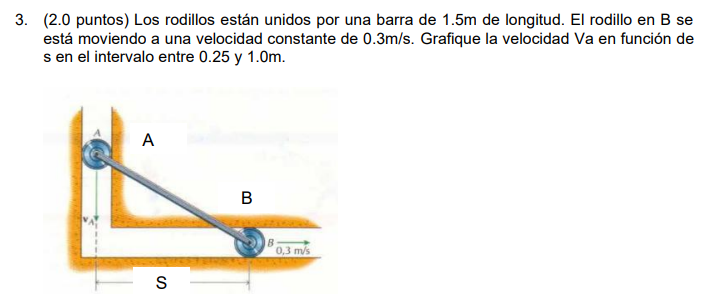

     Vb     
────────────
   _________
  ╱  2    2 
╲╱  l  - s  

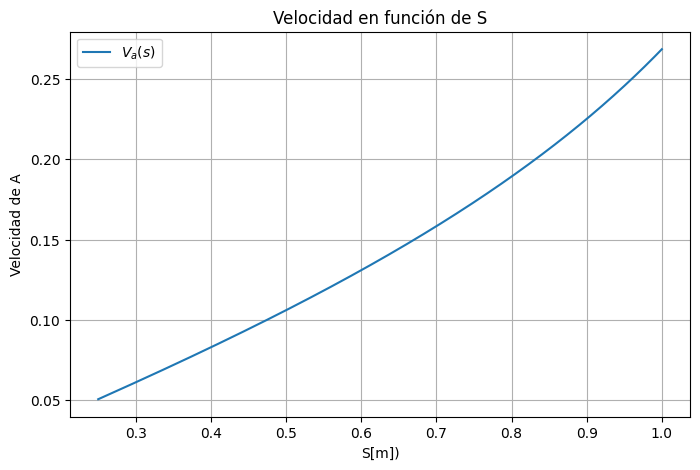

In [30]:
#Lo hacemos con velocidad cero
s = symbols("s")
l = symbols("l")
d = (l**2 - s**2)**(1/2)
Vb = symbols("Vb")
w = symbols("w")

eq_1 = Eq(Vb,w*d)
w_sol = solve(eq_1, w)[0]
display(w_sol)
Va = w_sol*s

diccionario = {
    l: 1.5,
    Vb:0.3
}

# Función evaluable con numpy
Va_fun = lambdify(s, Va.subs(diccionario), "numpy")

# Rango de tiempo
s_vals = np.linspace(0.25, 1, 500)  
Va_vals = Va_fun(s_vals)

# Graficamos
plt.figure(figsize=(8,5))
plt.plot(s_vals, Va_vals, label=r'$V_a(s)$')
plt.xlabel('S[m])')
plt.ylabel('Velocidad de A')
plt.title('Velocidad en función de S')
plt.legend()
plt.grid(True)
plt.show()

PUNTO 4

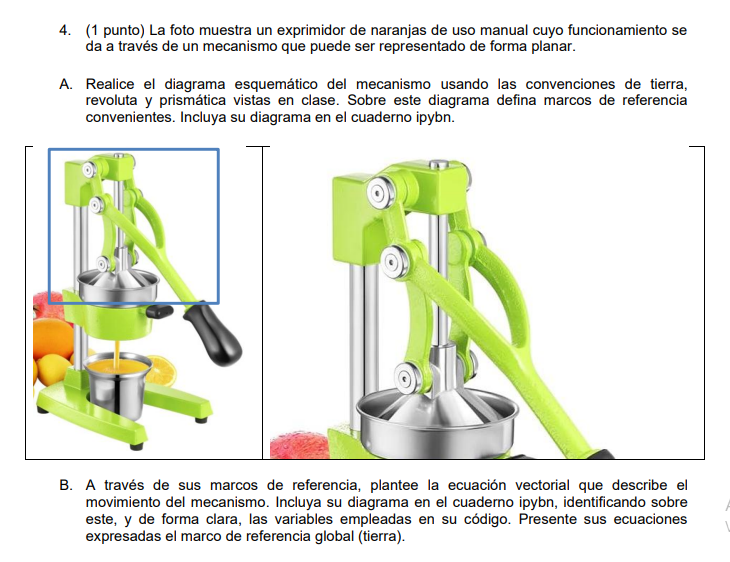

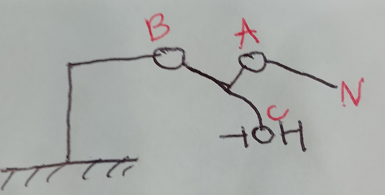

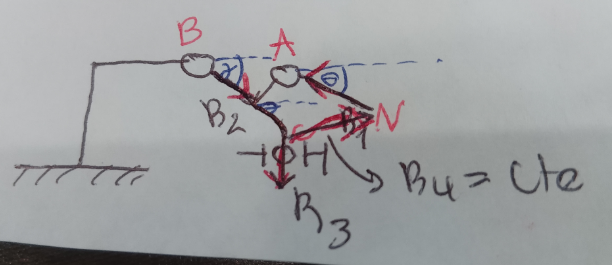

In [31]:
t = symbols("t")
theta = dynamicsymbols("theta")

l1 = symbols("l1")
l2 = symbols("l2")
l3 = symbols("l3")
distancia_mango_tolva = symbols("dmt")

N = ReferenceFrame("N")
A = N.orientnew("A", "axis", (np.pi - theta, N.z))
B = N.orientnew("B", "axis",(-theta, N.z) )
C = N.orientnew("C", "axis", (-theta, N.z))

R1 = l1*A.x #mango
R2 = l2*B.x #pieza
R3 = (l3*B.x.dot(N.y))*N.y # vector de la tolba, la que presiona la naranja
R4 = distancia_mango_tolva*C.x #

#Planteamos el loop de vectores
loop = R1 + R2 + R3 + R4
display(loop.express(N).simplify())


(dmt⋅cos(θ) + l₁⋅cos(θ - 3.14159265358979) + l₂⋅cos(θ)) n_x + (-dmt⋅sin(θ) - l ↪

↪ ₁⋅sin(θ - 3.14159265358979) - l₂⋅sin(θ) - l₃⋅sin(θ)) n_y